<a href="https://colab.research.google.com/github/kimgu11/NLP_2023/blob/main/example/dog_and_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install numpy

In [11]:
def check_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                Image.open(file_path)
            except Exception as e:
                print(f"Error opening {file_path}: {e}")

Found 10 images belonging to 3 classes.
Found 10 images belonging to 3 classes.
Epoch 1/10
1/1 [==============================] - 10s 10s/step - loss: 0.6505 - accuracy: 0.5000 - val_loss: -0.6574 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 5s 5s/step - loss: -0.6574 - accuracy: 0.5000 - val_loss: -2.1985 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 6s 6s/step - loss: -2.1985 - accuracy: 0.5000 - val_loss: -4.8699 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 5s 5s/step - loss: -4.8699 - accuracy: 0.5000 - val_loss: -9.4905 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 5s 5s/step - loss: -9.4905 - accuracy: 0.5000 - val_loss: -16.9372 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 6s 6s/step - loss: -16.9372 - accuracy: 0.5000 - val_loss: -28.4368 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 5s 5s/step - loss: -28.4368 - ac

1/1 [==============================] - 0s 136ms/step


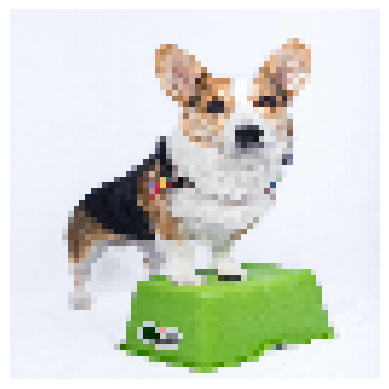

The image is predicted as: Dog


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os
import numpy as np
import cv2
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing import image


# 데이터 경로 설정
train_dir = '/content/testdata'
test_dir = '/content/training_data'

# 이미지 데이터 생성기 설정
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 훈련 데이터 및 검증 데이터 불러오기
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

#이미지 검사
check_images(train_dir)
check_images(test_dir)

# CNN 모델 정의
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(train_generator, epochs=10, validation_data=test_generator)

# 테스트 이미지로 모델 테스트
def predict_image(file_path):
    img = image.load_img(file_path, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    result = model.predict(img)
    return result

# 테스트 이미지 경로 설정
test_image_path = '/content/test/test_image.jpg'

# 이미지 예측
prediction_result = predict_image(test_image_path)

# 이미지 로드
img = image.load_img(test_image_path, target_size=(64, 64))
img_array = image.img_to_array(img)

# 이미지 출력
plt.imshow(img_array.astype(int))
plt.axis('off')  # 축 숨기기
plt.show()

# 예측 결과 출력
if prediction_result[0][0] > 0.5:
    prediction = 'Dog'
else:
    prediction = 'Cat'

print(f'The image is predicted as: {prediction}')

